# Machine Learning Project

## Tyler Gomez Riddick

In [85]:
%set_env OMP_NUM_THREADS=2

env: OMP_NUM_THREADS=2


In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import k_means
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [80]:
mlb = pd.read_csv('mlbstats.csv')
mlb.head(5)

,Unnamed: 0,Rk,Team,W,L,WL,Strk,R,RA,Rdiff,...,xwOBA,wRC.,BsR,Off,Def,WAR,city.y,Key.y,Population,teamLong
0,1,1,Atlanta Braves,104,58,0.642,L 1,5.8,4.4,1.4,...,NaN,124.702839,9.481685,200.458365,-7.652162,40.331090,Atlanta,Atlanta2023,6106000,Atlanta Braves
1,2,2,Baltimore Orioles,101,61,0.623,L 1,5.0,4.2,0.8,...,NaN,105.412898,16.104843,55.817328,-24.535125,24.035980,Baltimore,Baltimore2023,2355000,Baltimore Orioles
2,3,3,Los Angeles Dodgers,100,62,0.617,W 1,5.6,4.3,1.3,...,NaN,116.298661,0.265958,128.123863,-18.125476,32.357372,LosAngeles,LosAngeles2023,12534000,Los Angeles Dodgers
3,4,4,Tampa Bay Rays,99,63,0.611,W 2,5.3,4.1,1.2,...,NaN,117.939572,6.525768,139.023257,-26.176643,32.309462,Tampa,Tampa2023,2977000,Tampa Bay Rays
4,5,5,Milwaukee Brewers,92,70,0.568,W 1,4.5,4.0,0.5,...,NaN,91.855839,5.938819,-55.445050,31.582726,18.168124,Milwaukee,Milwaukee2023,1455000,Milwaukee Brewers


In [81]:
mlb['popMil'] = mlb['Population']/1000000

In [82]:
mlb

,Unnamed: 0,Rk,Team,W,L,WL,Strk,R,RA,Rdiff,...,wRC.,BsR,Off,Def,WAR,city.y,Key.y,Population,teamLong,popMil
0,1,1,Atlanta Braves,104,58,0.642,L 1,5.8,4.4,1.4,...,124.702839,9.481685,200.458365,-7.652162,40.331090,Atlanta,Atlanta2023,6106000,Atlanta Braves,6.106
1,2,2,Baltimore Orioles,101,61,0.623,L 1,5.0,4.2,0.8,...,105.412898,16.104843,55.817328,-24.535125,24.035980,Baltimore,Baltimore2023,2355000,Baltimore Orioles,2.355
2,3,3,Los Angeles Dodgers,100,62,0.617,W 1,5.6,4.3,1.3,...,116.298661,0.265958,128.123863,-18.125476,32.357372,LosAngeles,LosAngeles2023,12534000,Los Angeles Dodgers,12.534
3,4,4,Tampa Bay Rays,99,63,0.611,W 2,5.3,4.1,1.2,...,117.939572,6.525768,139.023257,-26.176643,32.309462,Tampa,Tampa2023,2977000,Tampa Bay Rays,2.977
4,5,5,Milwaukee Brewers,92,70,0.568,W 1,4.5,4.0,0.5,...,91.855839,5.938819,-55.445050,31.582726,18.168124,Milwaukee,Milwaukee2023,1455000,Milwaukee Brewers,1.455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,506,26,Baltimore Orioles,70,92,0.432,NaN,4.7,5.5,-0.8,...,96.073260,-4.451067,-36.361476,-2.703412,17.128755,Baltimore,Baltimore2006,2155000,Baltimore Orioles,2.155
506,507,27,Pittsburgh Pirates,67,95,0.414,NaN,4.3,4.9,-0.7,...,86.154746,-2.188338,-115.023330,-12.981440,7.730528,Pittsburgh,Pittsburgh2006,1741000,Pittsburgh Pirates,1.741
507,508,28,Chicago Cubs,66,96,0.407,NaN,4.4,5.1,-0.7,...,84.208283,-0.963957,-128.867729,65.288508,13.717042,Chicago,Chicago2006,8494000,Chicago Cubs,8.494
508,509,29,Kansas City Royals,62,100,0.383,NaN,4.7,6.0,-1.3,...,91.632619,2.974435,-64.620990,37.688159,18.262422,KansasCity,KansasCity2006,1458000,Kansas City Royals,1.458


In [83]:
mlbPopWins = mlb.loc[:,['Population','W']]

mlbPopAtt = mlb.loc[:,['Population','Attendance']]

mlbWinsAtt = mlb.loc[:,['Attendance','W']]

mlbPop = mlb.loc[:,['popMil']]

mlbWins = mlb.loc[:,['W']]

In [84]:
mlbPop.dropna(inplace=False)

,popMil
0,6.106
1,2.355
2,12.534
3,2.977
4,1.455
...,...
505,2.155
506,1.741
507,8.494
508,1.458


In [6]:
mlbWins

,W
0,104
1,101
2,100
3,99
4,92
...,...
505,70
506,67
507,66
508,62


## Clustering for Population

In [85]:
centroidP,labelP,inertiaP = k_means(
    mlbPop,n_clusters = 5,n_init=30
)
inertiaP
mlb['popLabel']=labelP

C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


## Clustering for Wins

In [86]:
centroidW,labelW,inertiaW = k_means(
    mlbWins,n_clusters = 7,n_init=30
)
inertiaW
mlb['winLabel']=labelW

C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [87]:
slimStats = pd.read_csv('slimStats.csv')
mlbNorm = pd.read_csv('mlbNorm.csv')
mlbNorm['popLabel']=labelP
mlbNorm['winLabel']=labelW

In [109]:
slimStats.to_csv('slimStats2.csv')
mlb

,Unnamed: 0,Rk,Team,W,L,WL,Strk,R,RA,Rdiff,...,Off,Def,WAR,city.y,Key.y,Population,teamLong,popMil,popLabel,winLabel
0,1,1,Atlanta Braves,104,58,0.642,L 1,5.8,4.4,1.4,...,200.458365,-7.652162,40.331090,Atlanta,Atlanta2023,6106000,Atlanta Braves,6.106,3,6
1,2,2,Baltimore Orioles,101,61,0.623,L 1,5.0,4.2,0.8,...,55.817328,-24.535125,24.035980,Baltimore,Baltimore2023,2355000,Baltimore Orioles,2.355,1,6
2,3,3,Los Angeles Dodgers,100,62,0.617,W 1,5.6,4.3,1.3,...,128.123863,-18.125476,32.357372,LosAngeles,LosAngeles2023,12534000,Los Angeles Dodgers,12.534,4,6
3,4,4,Tampa Bay Rays,99,63,0.611,W 2,5.3,4.1,1.2,...,139.023257,-26.176643,32.309462,Tampa,Tampa2023,2977000,Tampa Bay Rays,2.977,1,6
4,5,5,Milwaukee Brewers,92,70,0.568,W 1,4.5,4.0,0.5,...,-55.445050,31.582726,18.168124,Milwaukee,Milwaukee2023,1455000,Milwaukee Brewers,1.455,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,506,26,Baltimore Orioles,70,92,0.432,NaN,4.7,5.5,-0.8,...,-36.361476,-2.703412,17.128755,Baltimore,Baltimore2006,2155000,Baltimore Orioles,2.155,1,5
506,507,27,Pittsburgh Pirates,67,95,0.414,NaN,4.3,4.9,-0.7,...,-115.023330,-12.981440,7.730528,Pittsburgh,Pittsburgh2006,1741000,Pittsburgh Pirates,1.741,1,5
507,508,28,Chicago Cubs,66,96,0.407,NaN,4.4,5.1,-0.7,...,-128.867729,65.288508,13.717042,Chicago,Chicago2006,8494000,Chicago Cubs,8.494,0,5
508,509,29,Kansas City Royals,62,100,0.383,NaN,4.7,6.0,-1.3,...,-64.620990,37.688159,18.262422,KansasCity,KansasCity2006,1458000,Kansas City Royals,1.458,1,0


## Elbow Method

C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

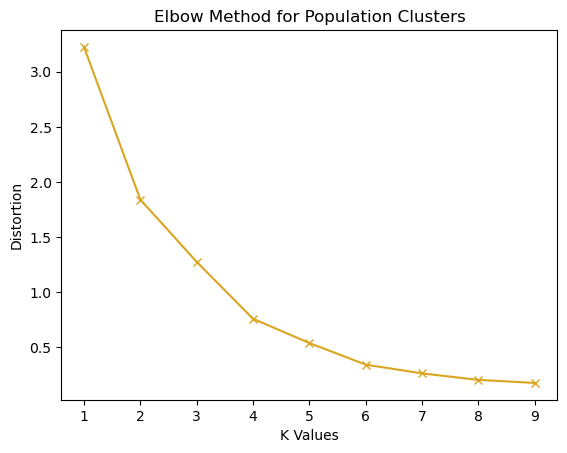

In [93]:
from scipy.spatial.distance import cdist
distortionsPop = []
inertiasPop = []
mapping1Pop = {}
mapping2Pop = {}
K = range(1,10)
XPop = mlbPop

for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(XPop)
    kmeanModel.fit(XPop)

    distortionsPop.append(sum(np.min(cdist(XPop, kmeanModel.cluster_centers_, 'euclidean'),
                                    axis = 1)) / XPop.shape[0])
    inertiasPop.append(kmeanModel.inertia_)
    mapping1Pop[k] = sum(np.min(cdist(XPop, kmeanModel.cluster_centers_,
                                    'euclidean'), axis=1)) / XPop.shape[0]
    mapping2Pop[k] = kmeanModel.inertia_

plt.plot(K, distortionsPop, 'x-',color = 'goldenrod')
plt.xlabel('K Values')
plt.ylabel('Distortion')
plt.title('Elbow Method for Population Clusters')
plt.show()

C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

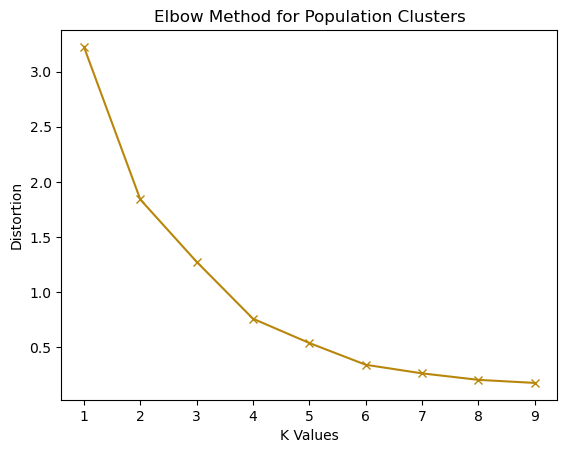

In [115]:
distortionsPop = []
inertiasPop = []
mapping1Pop = {}
mapping2Pop = {}
K = range(1,10)
XPop = mlbPop

for k in K:
    kmeanModel = KMeans(n_clusters = k,n_init=30).fit(XPop)
    kmeanModel.fit(XPop)

    distortionsPop.append(sum(np.min(cdist(XPop, kmeanModel.cluster_centers_, 'euclidean'),
                                    axis = 1)) / XPop.shape[0])
    inertiasPop.append(kmeanModel.inertia_)
    mapping1Pop[k] = sum(np.min(cdist(XPop, kmeanModel.cluster_centers_,
                                    'euclidean'), axis=1)) / XPop.shape[0]
    mapping2Pop[k] = kmeanModel.inertia_

plt.plot(K, distortionsPop, 'x-',color = 'darkgoldenrod')
plt.xlabel('K Values')
plt.ylabel('Distortion')
plt.title('Elbow Method for Population Clusters')
plt.savefig('elbow-pop.png')

C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

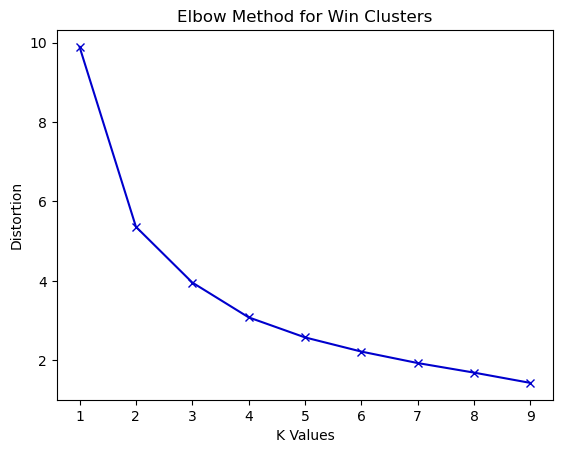

In [103]:
distortionsWins = []
inertiasWins = []
mapping1Wins = {}
mapping2Wins = {}
K = range(1,10)
XWins = mlbWins

for k in K:
    kmeanModel = KMeans(n_clusters = k,n_init=30).fit(XWins)
    kmeanModel.fit(XWins)

    distortionsWins.append(sum(np.min(cdist(XWins, kmeanModel.cluster_centers_, 'euclidean'),
                                    axis = 1)) / XWins.shape[0])
    inertiasWins.append(kmeanModel.inertia_)
    mapping1Wins[k] = sum(np.min(cdist(XWins, kmeanModel.cluster_centers_,
                                    'euclidean'), axis=1)) / XWins.shape[0]
    mapping2Wins[k] = kmeanModel.inertia_

plt.plot(K, distortionsWins, 'x-',color='mediumblue')
plt.xlabel('K Values')
plt.ylabel('Distortion')
plt.title('Elbow Method for Win Clusters')
plt.savefig('elbow-wins.png')

# Silhouette Scoring

C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

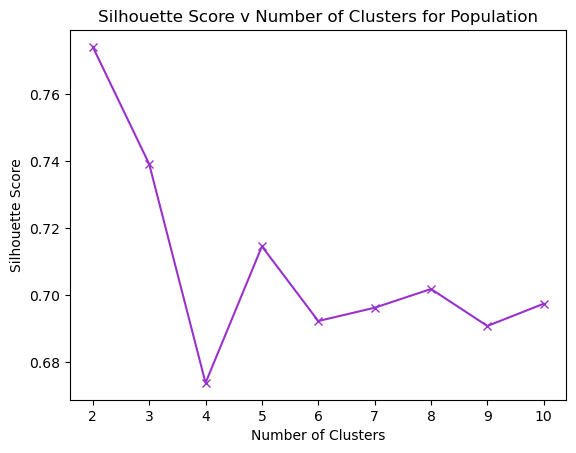

In [100]:
from sklearn.metrics import silhouette_score
sil = []
ks = []
kmax = 10

for k in range(2, kmax+1):
    ks.append(k)
    kmeans = KMeans(n_clusters = k,n_init=30).fit(mlbPop)
    labels = kmeans.labels_
    sil.append(silhouette_score(mlbPop,labels,metric = 'euclidean'))
plt.plot(ks,sil,'x-',color='darkorchid')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score v Number of Clusters for Population')
plt.savefig('sil_score_pop.png')

C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tyler\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

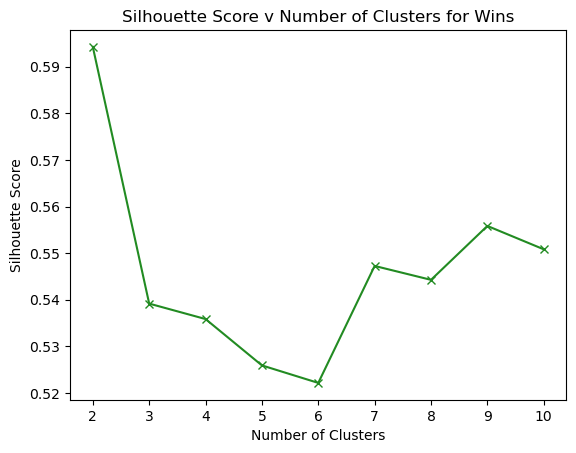

In [105]:
silW = []
ksW = []
kmax = 10

for k in range(2, kmax+1):
    ksW.append(k)
    kmeans = KMeans(n_clusters = k,n_init=30).fit(mlbWins)
    labels = kmeans.labels_
    silW.append(silhouette_score(mlbWins,labels,metric = 'euclidean'))
plt.plot(ksW,silW,'x-',color='forestgreen')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score v Number of Clusters for Wins')
plt.savefig('sil_score_wins.png')

# Principal Component Analysis

In [235]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
slimStats = pd.read_csv('slimStats.csv')
mlbNorm = pd.read_csv('mlbNorm.csv')
pca = PCA(n_components=1)
lr = LinearRegression()

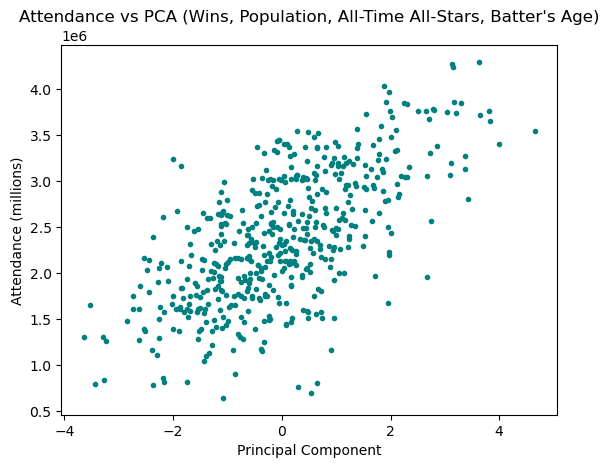

In [249]:
sst1 = mlbNorm.loc[:,['W','Population','#a-tA-S','BatAge']]
spca1 = pca.fit_transform(sst1)
pca.components_
plt.plot(spca1[:,0],slimStats.loc[:,'Attendance'],'.',color='teal')
plt.xlabel('Principal Component')
plt.ylabel('Attendance (millions)')
plt.title("Attendance vs PCA (Wins, Population, All-Time All-Stars, Batter's Age)")
plt.savefig('pca-mlbnorm.png')

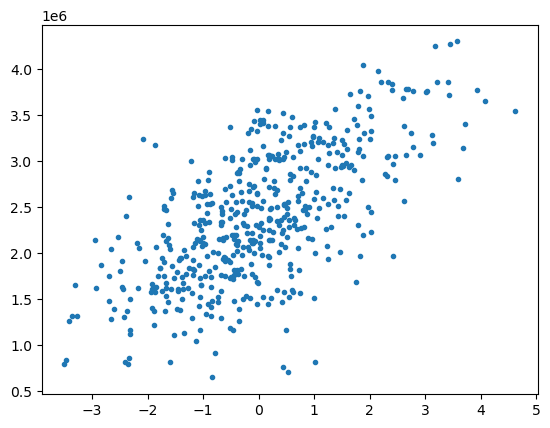

In [238]:
sst2 = mlbNorm.loc[:,['Rdiff','Population','#a-tA-S','BatAge']]
spca2 = pca.fit_transform(sst2)
pca.components_
plt.plot(spca2[:,0],slimStats.loc[:,'Attendance'],'.')

The R2 score is 0.44905983643427405
The Mean-Squared-Error is 0.6164294921893255
The Mean Absolute Error is 0.5950355392093093
The Mean Absolute Percentage Error is 1.2133908823358552


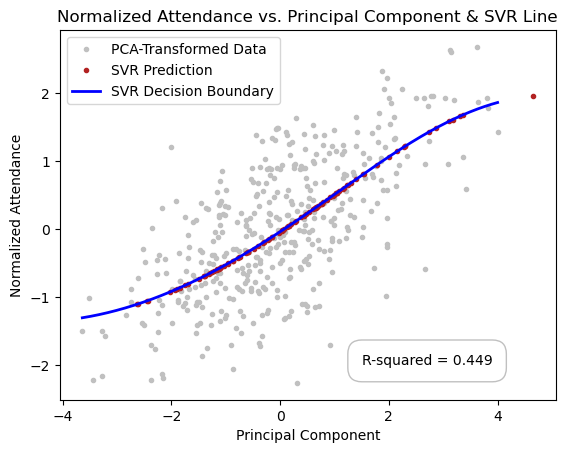

In [252]:
from sklearn.svm import SVR
sst1 = mlbNorm.loc[:,['W','Population','#a-tA-S','BatAge']]
spca1 = pca.fit_transform(sst1)
pca.components_
#plt.plot(spca1[:,0],slimStats.loc[:,'Attendance'],'.')

mask = mlbNorm[['Population','W','#a-tA-S']]
X = spca1
#X = mask
y = mlbNorm.loc[:,'Attendance']
#y = slimStats.loc[:,'Attendance']

SVR1 = SVR(kernel = "rbf", C=1, gamma=0.04)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

SVR1.fit(X_train, y_train)
#margin = 1 / np.sqrt(np.sum(SVR1.dual_coef_ ** 2))
#upper_boundary = SVR1.predict(X_test)+margin
#lower_boundary = SVR1.predict(X_test)-margin

y_pred = SVR1.predict(X_test)
r2score = r2_score(y_test,y_pred)
plt.plot(X_train,y_train,'.',color='silver',label = 'PCA-Transformed Data')
plt.plot(X_test,y_pred,'.',color='firebrick',label='SVR Prediction')
plt.xlabel('Principal Component')
plt.ylabel('Normalized Attendance')
plt.title('Normalized Attendance vs. Principal Component & SVR Line')
X_grid = np.linspace(X_train.min(), X_train.max(), 1000)[:, np.newaxis]
y_grid = SVR1.predict(X_grid)
plt.plot(X_grid, y_grid, color='blue', linewidth=2, label='SVR Decision Boundary')
plt.legend()
plt.text(1.5, -2, f'R-squared = {r2score:.3f}', fontsize=10, bbox=dict(facecolor='none', edgecolor='silver', boxstyle='round,pad=1'))
#plt.plot(X_test,upper_boundary,linestyle='--')
#plt.plot(X_test,lower_boundary,linestyle='--')

print('The R2 score is', r2_score(y_test,y_pred))
print('The Mean-Squared-Error is', mean_squared_error(y_test,y_pred))
print('The Mean Absolute Error is', mean_absolute_error(y_test,y_pred))
print('The Mean Absolute Percentage Error is', mean_absolute_percentage_error(y_test,y_pred))
plt.savefig('rbf-svr-model.png')

The R2 score is 0.4417436304502351
The Mean-Squared-Error is 0.6246153632470917
The Mean Absolute Error is 0.6009154170726289
The Mean Absolute Percentage Error is 1.214052424536123


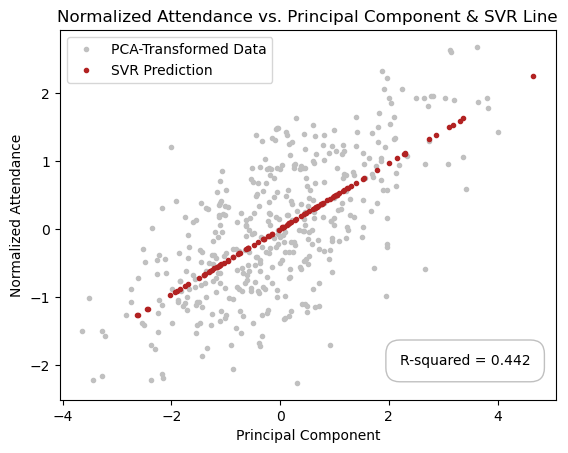

In [212]:
from sklearn.svm import SVR
sst1 = mlbNorm.loc[:,['W','Population','#a-tA-S','BatAge']]
spca1 = pca.fit_transform(sst1)
pca.components_
#plt.plot(spca1[:,0],slimStats.loc[:,'Attendance'],'.')

mask = mlbNorm[['Population','W','#a-tA-S']]
X = spca1
#X = mask
y = mlbNorm.loc[:,'Attendance']
#y = slimStats.loc[:,'Attendance']

SVR1 = SVR(kernel = "linear", C=1, epsilon=0.16)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

SVR1.fit(X_train, y_train)
#margin = 1 / np.sqrt(np.sum(SVR1.dual_coef_ ** 2))
#upper_boundary = SVR1.predict(X_test)+margin
#lower_boundary = SVR1.predict(X_test)-margin

y_pred = SVR1.predict(X_test)
r2score = r2_score(y_test,y_pred)
plt.plot(X_train,y_train,'.',color='silver',label = 'PCA-Transformed Data')
plt.plot(X_test,y_pred,'.',color='firebrick',label='SVR Linear Prediction')
plt.xlabel('Principal Component')
plt.ylabel('Normalized Attendance')
plt.title('Normalized Attendance vs. Principal Component & SVR Line')
plt.legend()
plt.text(2.2, -2, f'R-squared = {r2score:.3f}', fontsize=10, bbox=dict(facecolor='none', edgecolor='silver', boxstyle='round,pad=1'))
#plt.plot(X_test,upper_boundary,linestyle='--')
#plt.plot(X_test,lower_boundary,linestyle='--')

print('The R2 score is', r2_score(y_test,y_pred))
print('The Mean-Squared-Error is', mean_squared_error(y_test,y_pred))
print('The Mean Absolute Error is', mean_absolute_error(y_test,y_pred))
print('The Mean Absolute Percentage Error is', mean_absolute_percentage_error(y_test,y_pred))
plt.savefig('linear-svr-model.png')

In [171]:
def svrhyperlinear(x,y):
    list = [0,0,0]
    for i in range(x):
        for j in range(y):
            SVRtest = SVR(kernel = 'linear', C=i+1, epsilon = (j/100))
            SVRtest.fit(X_train, y_train)
            y_pred = SVRtest.predict(X_test)
            r2 = r2_score(y_test,y_pred)
            print(r2,i,(j/100))
            if r2 > list[0]:
                list[0] = r2
                list[1] = i+1
                list[2] = (j/100)
    print(list)

In [165]:
def svrhyperrbf(x,y):
    list = [0,0,0]
    for i in range(x):
        for j in range(y):
            SVRtest = SVR(kernel = 'rbf', C=i+1, gamma = (j/100))
            SVRtest.fit(X_train, y_train)
            y_pred = SVRtest.predict(X_test)
            r2 = r2_score(y_test,y_pred)
            print(r2,i,j)
            if r2 > list[0]:
                list[0] = r2
                list[1] = i+1
                list[2] = (j/100)
    print(list)

In [166]:
svrhyperrbf(101,101)

-8.589752752241608e-05 0 0
0.44416704186693035 0 1
0.4467046229088236 0 2
0.4468104471358748 0 3
0.4490598364342746 0 4
0.448816138687842 0 5
0.4484279392926298 0 6
0.4461264745543374 0 7
0.4447487625177312 0 8
0.4424846196257225 0 9
0.4416445760674296 0 10
0.4402675867221786 0 11
0.4383891998468529 0 12
0.43777189933412164 0 13
0.43718303384143775 0 14
0.43601795774069485 0 15
0.4352551513248609 0 16
0.43477580840296093 0 17
0.4341638718921582 0 18
0.43351551735234095 0 19
0.43245100981217444 0 20
0.431158277662671 0 21
0.43002905266643965 0 22
0.4296341035875102 0 23
0.42993712572825227 0 24
0.42987398243063557 0 25
0.429817036703099 0 26
0.4298526208815485 0 27
0.42932033071485975 0 28
0.42944739564739964 0 29
0.43017459408651926 0 30
0.43012695474826845 0 31
0.4298129803435672 0 32
0.4299591346350471 0 33
0.42990020507051896 0 34
0.43001885622660185 0 35
0.430042848963766 0 36
0.4299431588110153 0 37
0.4299046585358458 0 38
0.4297223980212407 0 39
0.42958852528937286 0 40
0.4293995

In [172]:
svrhyperlinear(101,101)

0.4406089629831086 0 0.0
0.43972481381505624 0 0.01
0.4388409127981643 0 0.02
0.439028700620576 0 0.03
0.4388533484577497 0 0.04
0.4371519256393176 0 0.05
0.43809479965134446 0 0.06
0.43892560783493173 0 0.07
0.43919279315453297 0 0.08
0.4387836410887732 0 0.09
0.438464935871995 0 0.1
0.43902409033257106 0 0.11
0.43895015509880897 0 0.12
0.4396295623747828 0 0.13
0.4413146597604941 0 0.14
0.44130978740354887 0 0.15
0.44174363045023457 0 0.16
0.44115198394860544 0 0.17
0.44010011393401527 0 0.18
0.44072329529124343 0 0.19
0.44003299380598704 0 0.2
0.4402587684276793 0 0.21
0.4395454414352714 0 0.22
0.4394971285329897 0 0.23
0.43816101581888434 0 0.24
0.43717822678628193 0 0.25
0.43540231890063275 0 0.26
0.4334447202100795 0 0.27
0.43340692053520324 0 0.28
0.4341622940948887 0 0.29
0.43608746067807425 0 0.3
0.4342324630986929 0 0.31
0.4323750807707665 0 0.32
0.43299085119260006 0 0.33
0.4311076260476595 0 0.34
0.43247303570189 0 0.35
0.43356860192783586 0 0.36
0.432465845436407 0 0.37
0.

# Support Vector Regression with Clustering by Wins

In [169]:
def svrWins(x,y):
    list = []
    pca = PCA(n_components=1)
    SVRw = SVR(kernel = "linear", C=y, gamma='auto')
    for i in range(x):
        clus = mlbNorm.loc[:,['Population','#a-tA-S','winLabel','Attendance']]
        clus = clus.loc[clus['winLabel'] == i]
        X = clus.loc[:,['Population','#a-tA-S']]
        y = clus['Attendance']
        pcaw = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(pcaw,y,test_size=0.2,random_state=42)
        SVRw.fit(X_train, y_train)
        y_pred = SVR1.predict(X_test)
        r2 = r2_score(y_test,y_pred)
        list.append([i,r2])
    print(list)

In [170]:
svrWins(7,20)

[[0, 0.022731885149876008], [1, 0.2660637614167122], [2, -1.2477504949772773], [3, 0.6090152786075009], [4, -0.10952709660813875], [5, -0.3623107028308692], [6, -0.1423983056975311]]


# Linear Regression

In [250]:
lrdf = pd.DataFrame()
lrdf['PCA'] = spca1[:,0] # Calling the principal component model from the previous section
#lrdf['Attendance'] = slimStats.loc[:,'Attendance']
lrdf['Attendance'] = mlbNorm.loc[:,'Attendance']

Xl = lrdf['PCA']
yl = lrdf['Attendance']
Xl = Xl.values.reshape(-1,1)
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl,yl,test_size=0.2,random_state=42)
lrdf
lr.fit(Xl_train,yl_train)
yl_pred = lr.predict(Xl_test)
r2l = r2_score(yl_test,yl_pred)

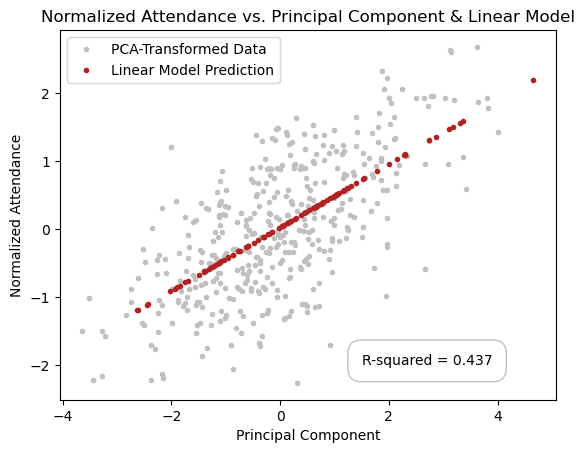

In [251]:
plt.plot(Xl_train,yl_train,'.',color='silver',label = 'PCA-Transformed Data')
plt.plot(Xl_test,yl_pred,'.',color='firebrick',label='Linear Model Prediction')
plt.xlabel('Principal Component')
plt.ylabel('Normalized Attendance')
plt.title('Normalized Attendance vs. Principal Component & Linear Model')
plt.legend()
plt.text(1.5, -2, f'R-squared = {r2l:.3f}', fontsize=10, bbox=dict(facecolor='none', edgecolor='silver', boxstyle='round,pad=1'))
plt.savefig('linear-model.png')

## Correlation Matrix

In [207]:
pd.set_option('display.max_rows', None)  # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns
corrcol = mlbNorm.loc[:,['W','R','#a-tA-S','Rk','L','WL','RA','Rdiff','BatAge','PAge','#A-S','HR','RTotal','SB','K.','ISO','AVG','OBP','wOBA','wRC.','WAR','Population']]
corrcol = pd.concat([corrcol,slimStats.loc[:,'Attendance']],axis=1)
cormat = corrcol.corr()

In [218]:
cormat[cormat.abs() >= 0.4]

,W,R,#a-tA-S,Rk,L,WL,RA,Rdiff,BatAge,PAge,#A-S,HR,RTotal,SB,K.,ISO,AVG,OBP,wOBA,wRC.,WAR,Population,Attendance
W,1.000000,0.598129,0.523908,-0.972901,-0.999743,0.999924,-0.709319,0.939405,NaN,NaN,0.638213,0.411221,0.601933,NaN,NaN,0.443257,NaN,0.539844,0.574046,0.694340,0.787654,NaN,0.454468
R,0.598129,1.000000,NaN,-0.579554,-0.597639,0.597636,NaN,0.662475,NaN,NaN,0.464513,0.669415,0.997958,NaN,NaN,0.760924,0.656164,0.829521,0.913154,0.727238,0.677080,NaN,NaN
#a-tA-S,0.523908,NaN,1.000000,-0.506384,-0.524218,0.523954,NaN,0.537596,0.412276,0.404007,0.505135,NaN,NaN,NaN,NaN,NaN,NaN,0.427604,0.425478,0.436392,0.490762,NaN,0.529812
Rk,-0.972901,-0.579554,-0.506384,1.000000,0.972866,-0.972974,0.689855,-0.910728,NaN,NaN,-0.636945,NaN,-0.582641,NaN,NaN,-0.418073,NaN,-0.525382,-0.553458,-0.669772,-0.765465,NaN,-0.444030
L,-0.999743,-0.597639,-0.524218,0.972866,1.000000,-0.999928,0.709620,-0.939181,NaN,NaN,-0.638587,-0.410253,-0.601045,NaN,NaN,-0.442725,NaN,-0.540106,-0.573588,-0.693690,-0.788067,NaN,-0.453437
WL,0.999924,0.597636,0.523954,-0.972974,-0.999928,1.000000,-0.709821,0.939384,NaN,NaN,0.638518,0.410727,0.601256,NaN,NaN,0.442891,NaN,0.539700,0.573606,0.693871,0.787814,NaN,0.453718
RA,-0.709319,NaN,NaN,0.689855,0.709620,-0.709821,1.000000,-0.728040,NaN,NaN,-0.438417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.499883,NaN,NaN
Rdiff,0.939405,0.662475,0.537596,-0.910728,-0.939181,0.939384,-0.728040,1.000000,NaN,NaN,0.646474,0.435025,0.667417,NaN,NaN,0.478963,NaN,0.592012,0.626338,0.743122,0.836628,NaN,0.454272
BatAge,NaN,NaN,0.412276,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,-0.442867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.481435
PAge,NaN,NaN,0.404007,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478674


In [126]:
lrdf = pd.DataFrame()
lrdf['PCA'] = spca1[:,0]
lrdf['Attendance'] = slimStats.loc[:,'Attendance']

X = lrdf['PCA']
y = lrdf['Attendance']
X = X.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lrdf
lr.fit(X,y)
y_pred = lr.predict(X)
r2_score(y,y_pred)

0.344411252832442

## PCA and Linear Model

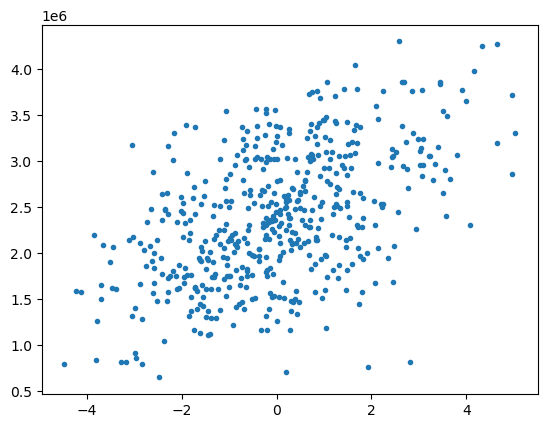

In [123]:
sst2 = mlbNorm.loc[:,['W','R','#a-tA-S','Population','OBP','HR']] # this selects the columns for the PCA
spca2 = pca.fit_transform(sst2) # Performing the PCA on the select columns
pca.components_
plt.plot(spca2[:,0],slimStats.loc[:,'Attendance'],'.') 

In [128]:
lrdf2 = pd.DataFrame()
lrdf2['PCA'] = spca2[:,0]
lrdf2['Attendance'] = slimStats.loc[:,'Attendance']

X2 = lrdf2['PCA']
y2 = lrdf2['Attendance']
X2 = X2.values.reshape(-1,1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)
lrdf
lr.fit(X2,y2)
y2_pred = lr.predict(X2)
r2_score(y2,y2_pred)

0.26452849338694917

In [82]:
lr.fit(X,y)
y_pred = lr.predict(X)
r2_score(y,y_pred)

0.22060607493082451